<a href="https://colab.research.google.com/github/snehagkadam/Internship-Task/blob/main/Prodigy(Task4_Sentiment_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


sentiment
Negative      22808
Positive      21109
Neutral       18603
Irrelevant    13162
Name: count, dtype: int64


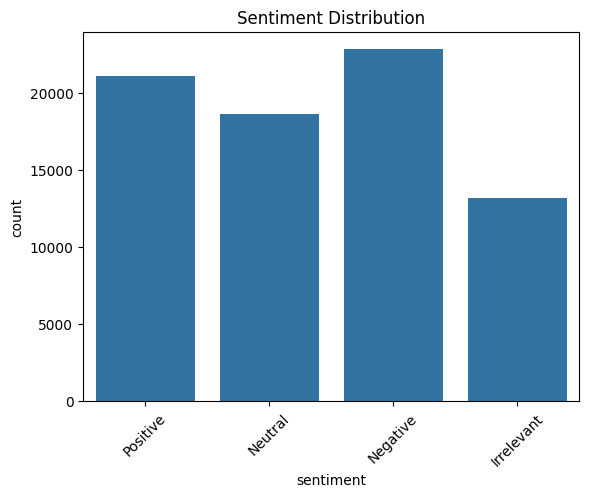

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download("stopwords")

# Load data
train_df = pd.read_csv("/content/twitter_training.csv", header=None, names=["id", "entity", "sentiment", "content"])
val_df = pd.read_csv("/content/twitter_validation.csv", header=None, names=["id", "entity", "sentiment", "content"])

# Combine datasets
df = pd.concat([train_df, val_df], ignore_index=True)

# View class distribution
print(df["sentiment"].value_counts())
sns.countplot(data=df, x="sentiment")
plt.title("Sentiment Distribution")
plt.xticks(rotation=45)
plt.show()



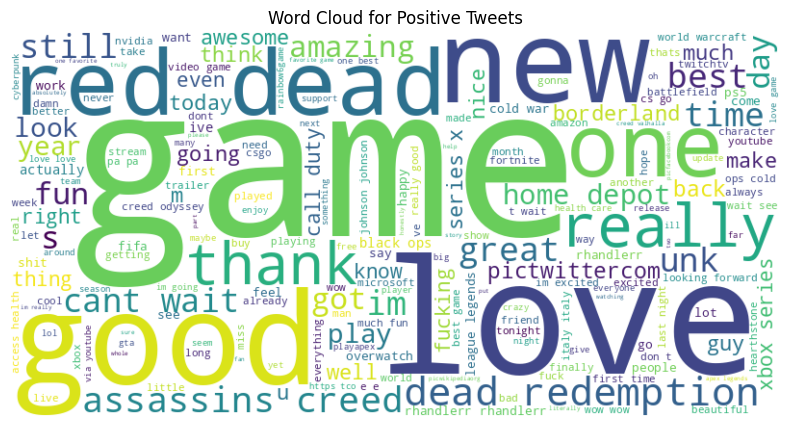

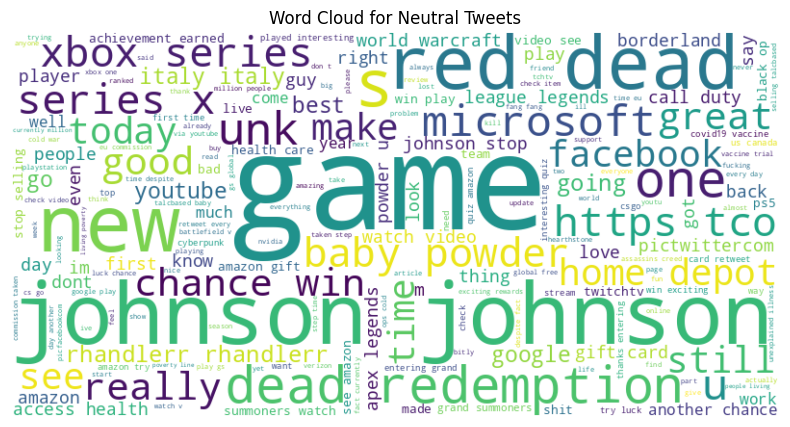

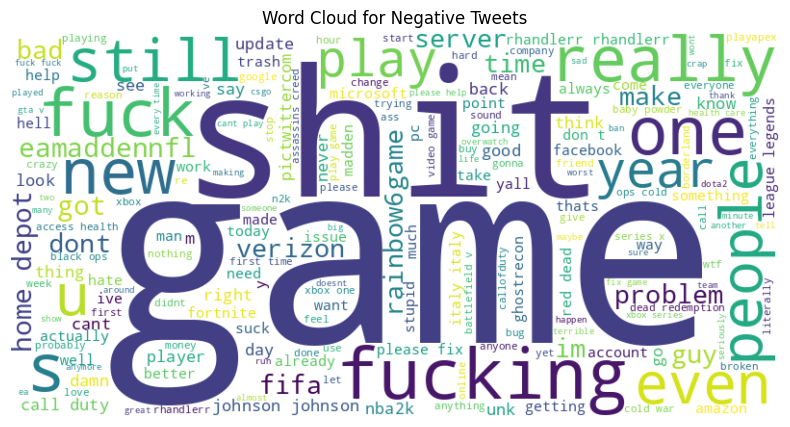

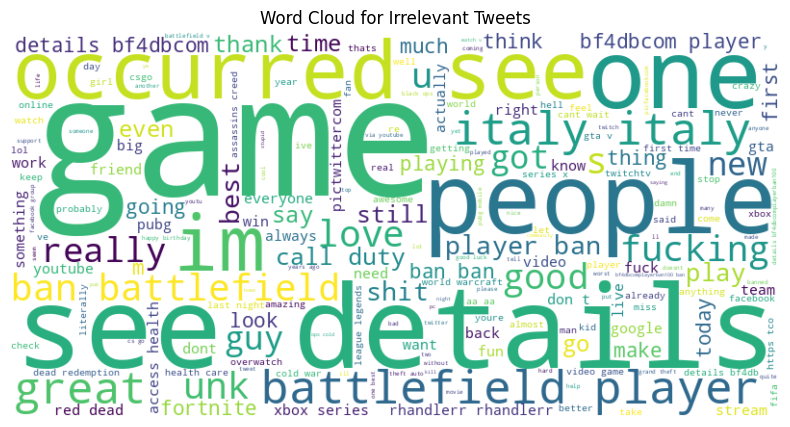

In [ ]:
# Basic cleaning function
# Corrected cleaning function to handle float/NaN values
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = text.translate(str.maketrans("", "", string.punctuation))
        words = text.split()
        stop_words = set(stopwords.words("english"))
        words = [word for word in words if word not in stop_words]
        return " ".join(words)
    else:
        return ""

df["clean_text"] = df["content"].apply(clean_text)

# Generate word cloud for each sentiment
for sentiment in df["sentiment"].unique():
    text = " ".join(df[df["sentiment"] == sentiment]["clean_text"])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment} Tweets")
    plt.show()
